In [ ]:
!pip install git+https://github.com/rtqichen/torchdiffeq.git
project_dir = "odenet"
import sys
if True: # On colab
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    root = "/content/drive/My Drive/Colab Notebooks/"+project_dir
    sys.path.append(root)
else: # Local
    root = './'

In [10]:
import torch
from matplotlib import pylab as plt
from odenet import datasets
from odenet.odenet_cifar10 import ODEResNet
from odenet import refine_train

In [3]:
refset,trainset,trainloader,testset,testloader \
    = datasets.get_dataset('CIFAR10')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


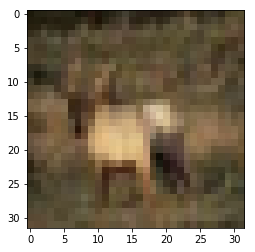

In [4]:
plt.imshow(refset.data[3])

In [5]:
model = ODEResNet()

In [6]:
imgs,labels = next(iter(trainloader))

In [7]:
y = model(imgs)

In [11]:
losses = refine_train.train_for_epochs(model, trainloader,
                             torch.nn.CrossEntropyLoss(), 1 )

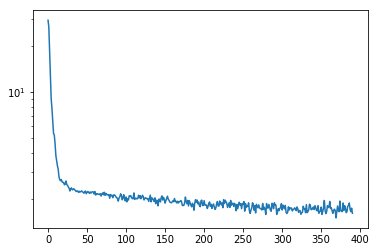

In [13]:
plt.semilogy(losses)

In [16]:
def acc(y,labels):
    return torch.sum(torch.argmax(y,dim=-1) == labels)*1.0/len(labels)

In [14]:
def plot_accuracy(model):
    imgs,labels = next(iter(testloader))
    y = model(imgs)
    print(acc(y,labels).item())
    bars = torch.nn.Softmax(dim=-1)(y[:10])
    size = len(bars)
    plt.figure(figsize=(10,10))
    for i,(pred,img,label) in enumerate(zip(bars,imgs,labels)):
        plt.subplot(size//2+1,4,1+2*i)
        plt.imshow(img[0,:,:].detach().numpy(),cmap='Greys')
        plt.subplot(size//2+1,4,2+2*i)
        plt.bar(range(10),[1 if y==label else 0 for y in range(10)])
        plt.bar(range(10),pred.detach().numpy())
    plt.show()

0.359375


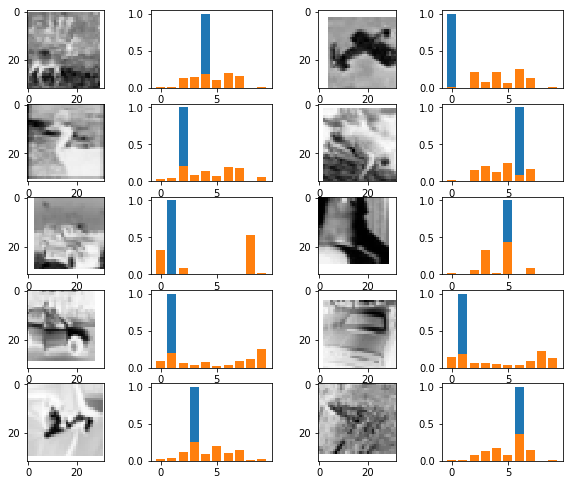

In [17]:
plot_accuracy(model)

In [18]:
refset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']